In [1]:
import pandas as pd
import numpy as np

In [2]:
spamData= pd.read_csv('./FinalDataset/Spam.csv')

In [4]:
a = spamData.isnull().sum().to_dict()

In [5]:
a

{'Querylength': 0,
 'domain_token_count': 0,
 'path_token_count': 0,
 'avgdomaintokenlen': 0,
 'longdomaintokenlen': 0,
 'avgpathtokenlen': 12,
 'tld': 0,
 'charcompvowels': 0,
 'charcompace': 0,
 'ldl_url': 0,
 'ldl_domain': 0,
 'ldl_path': 0,
 'ldl_filename': 0,
 'ldl_getArg': 0,
 'dld_url': 0,
 'dld_domain': 0,
 'dld_path': 0,
 'dld_filename': 0,
 'dld_getArg': 0,
 'urlLen': 0,
 'domainlength': 0,
 'pathLength': 0,
 'subDirLen': 0,
 'fileNameLen': 0,
 'this.fileExtLen': 0,
 'ArgLen': 0,
 'pathurlRatio': 0,
 'ArgUrlRatio': 0,
 'argDomanRatio': 0,
 'domainUrlRatio': 0,
 'pathDomainRatio': 0,
 'argPathRatio': 0,
 'executable': 0,
 'isPortEighty': 0,
 'NumberofDotsinURL': 0,
 'ISIpAddressInDomainName': 0,
 'CharacterContinuityRate': 0,
 'LongestVariableValue': 0,
 'URL_DigitCount': 0,
 'host_DigitCount': 0,
 'Directory_DigitCount': 0,
 'File_name_DigitCount': 0,
 'Extension_DigitCount': 0,
 'Query_DigitCount': 0,
 'URL_Letter_Count': 0,
 'host_letter_count': 0,
 'Directory_LetterCount':

In [8]:
spamData['avgpathtokenlen'] = spamData['avgpathtokenlen'].fillna(spamData['avgpathtokenlen'].mean())
spamData['NumberRate_Extension'] = spamData['NumberRate_Extension'].fillna(spamData['NumberRate_Extension'].mean())
spamData['NumberRate_AfterPath'] = spamData['NumberRate_AfterPath'].fillna(spamData['NumberRate_AfterPath'].mean())
spamData['Entropy_DirectoryName'] = spamData['Entropy_DirectoryName'].fillna(spamData['Entropy_DirectoryName'].mean())
spamData['Entropy_Filename'] = spamData['Entropy_Filename'].fillna(spamData['Entropy_Filename'].mean())
spamData['Entropy_Extension'] = spamData['Entropy_Extension'].fillna(spamData['Entropy_Extension'].mean())
spamData['Entropy_Afterpath'] = spamData['Entropy_Afterpath'].fillna(spamData['Entropy_Afterpath'].mean())

In [9]:
x = spamData.iloc[:,0:79]
y = spamData.iloc[:,-1]

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


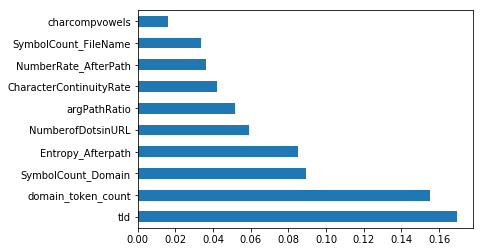

In [42]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
feature_imp= pd.Series(model.feature_importances_,index=x.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.show()


In [45]:
columns_to_keep = x[['SymbolCount_Domain', 'tld', 'NumberofDotsinURL', 'NumberRate_AfterPath', 'domainlength', 'Entropy_Afterpath', 'SymbolCount_URL', 'ArgUrlRatio', 'CharacterContinuityRate']]
from sklearn.model_selection import train_test_split
features_train,features_test,y_train,y_test = train_test_split(columns_to_keep,y,test_size=0.3,random_state=66)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(features_train,y_train)
score = rfc.score(features_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
score

0.9990791896869244